# Task 2- linear regression model to predict the marks that a student is expected to score upoun number of hours.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [15]:
df.head 

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [16]:
df.shape

(25, 2)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [19]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [20]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


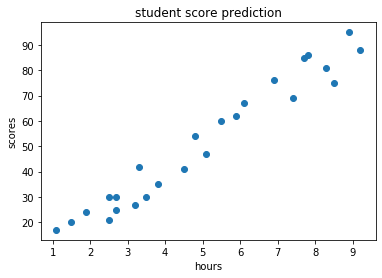

In [22]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('hours')
plt.ylabel('scores')
plt.title('student score prediction')
plt.show();



Prepare data

In [26]:
x=df.drop('Scores',axis=1)
x


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [28]:
y=df.Scores
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [29]:
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.2)

Training model

In [41]:
regression=LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
regression.score(x_test, y_test)

0.878044444103204

fit lines

In [43]:
regression.intercept_

3.7981967837989856

In [44]:
regression.coef_

array([9.321171])

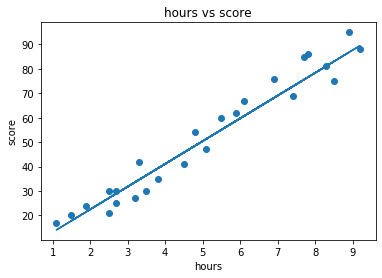

In [56]:
Y=regression.coef_*x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,Y)
plt.xlabel('hours')
plt.ylabel('score')
plt.title('hours vs score')
plt.show();


In [57]:
y_predict=regression.predict(x_test)
y_predict

array([76.50333055, 48.53981756, 60.65733986, 33.62594397, 75.57121345])

In [60]:
pd.DataFrame({'actual':y_test, 'predicted':y_predict})

,actual,predicted
24,86,76.503331
21,54,48.539818
18,67,60.657340
2,27,33.625944
10,85,75.571213


In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print('Mean absolute error',mean_absolute_error(y_test,y_predict))
print('Mean squared error',mean_squared_error(y_test,y_predict))
print('R2 score:',r2_score(y_test, y_predict))



Mean absolute error 7.470848507949931
Mean squared error 58.606961941764254
R2 score: 0.878044444103204


What will be predicted score, if student studied for 9.25 hour in a day?


In [66]:
print('hour studied:', 9.25)
print('predicted score:',regression.predict([[9.25]])[0])


hour studied: 9.25
predicted score: 90.01902849745821


according to model if student studied for 9.25 hour in day,the predicted score is 90.01.